In [1]:
%env DIR=/mnt/scratch/NGS/gind.alex
%env ENCODEID=ENCFF693MYU

env: DIR=/mnt/scratch/NGS/gind.alex
env: ENCODEID=ENCFF693MYU


In [2]:
!wget "https://www.encodeproject.org/files/$ENCODEID/@@download/$ENCODEID.bed.gz" -q -O - | gunzip | sort -t$'\t' -k9 | tail -50 > $HOME/$ENCODEID.bed
!cat $HOME/$ENCODEID.bed | wc -l

50


In [3]:
%%bash

cd $DIR

/opt/bin/datasets download genome \
    --no-progressbar \
    --filename hg38.zip \
    --reference \
    taxon human \
    --include genome \
    --assembly-level chromosome,complete \
    --chromosomes $(cat $HOME/$ENCODEID.bed | cut -f 1 | sed -e 's/chr//g' | uniq | paste -sd ',' -)

unzip -oqq hg38.zip -d hg38.d

New version of client (16.37.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/linux-amd64/datasets.


In [4]:
%%bash

rm -f $DIR/hg38.fna
find $DIR/hg38.d -regextype posix-extended -regex '.*chr[a-zA-Z0-9]*\.fna' -print0 | 
    while IFS= read -r -d '' fp; do 
        fn=$(echo $fp | rev | cut -d '/' -f 1 | rev | cut -d '.' -f 1)
        echo ">$fn" >> $DIR/hg38.fna
        tail -n+2 $fp >> $DIR/hg38.fna
    done

In [5]:
!rm -f $DIR/*.fai
!bedtools getfasta -fo $HOME/CTCF_top50_peak_seq.fa -fi $DIR/hg38.fna -bed $HOME/$ENCODEID.bed

index file /mnt/scratch/NGS/gind.alex/hg38.fna.fai not found, generating...


In [6]:
!rm -rf $DIR/hg38.d $DIR/hg38.zip $DIR/hg38.fna.fai $DIR/hg38.fna

In [10]:
!/opt/meme-5.5.1/bin/meme $HOME/CTCF_top50_peak_seq.fa -minw 6 -revcomp -nmotifs 3 -dna

Writing results to output directory 'meme_out'.
BACKGROUND: using background model of order 0
PRIMARY (classic): n 50 p0 50 p1 0 p2 0
SEQUENCE GROUP USAGE-- Starts/EM: p0; Trim: p0; pvalue: p0; nsites: p0,p1,p2
SEEDS: maxwords 9939 highwater mark: seq 50 pos 202
Initializing the motif probability tables for 2 to 50 sites...
nsites = 50
Done initializing.

seqs=    50, min_w= 112, max_w=  251, total_size=     9939

motif=1
SEED DEPTHS: 2 4 8 16 32 50
SEED WIDTHS: 6 8 11 15 21 29 41 50
em: w=  50, psites=  50, iter=  30 
motif=2
SEED DEPTHS: 2 4 8 16 32 50
SEED WIDTHS: 6 8 11 15 21 29 41 50
em: w=  50, psites=  50, iter=  40 
motif=3
SEED DEPTHS: 2 4 8 16 32 50
SEED WIDTHS: 6 8 11 15 21 29 41 50
em: w=  50, psites=  50, iter=  40 


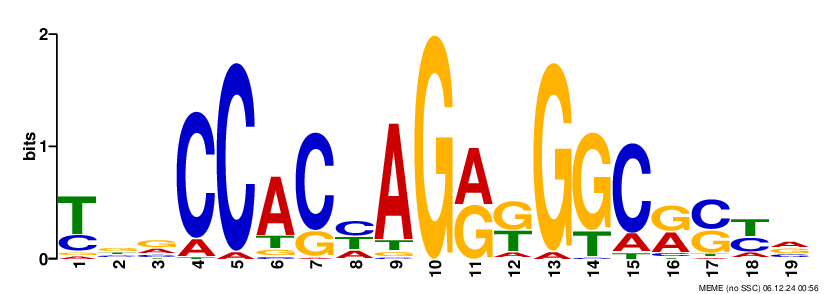

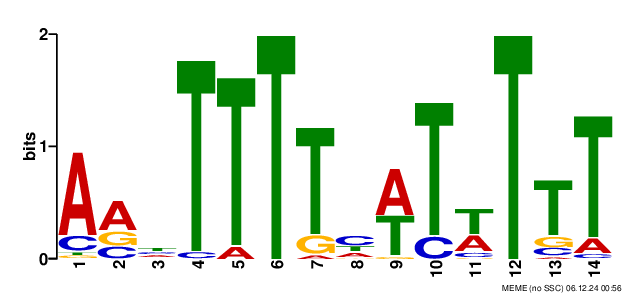

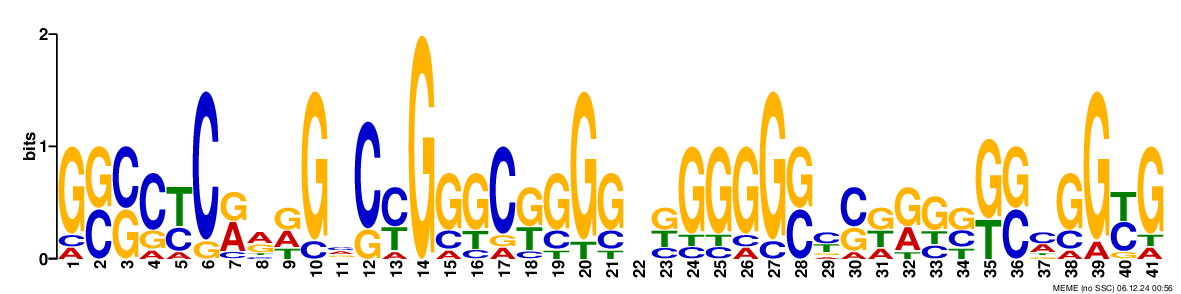

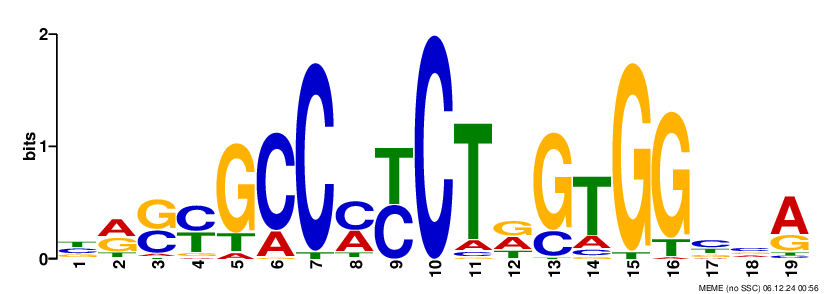

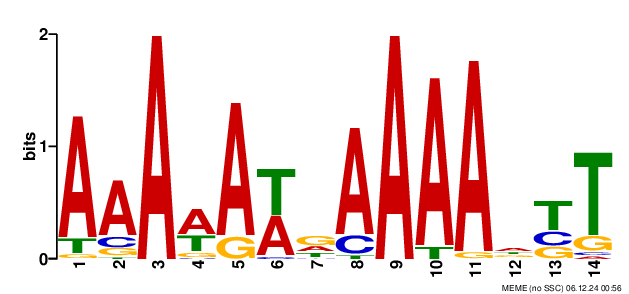

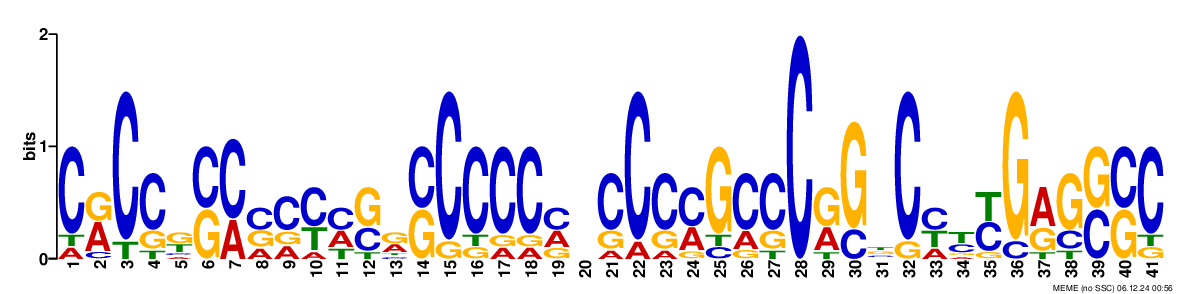

In [14]:
from IPython import display


pngs = !ls meme_out/*.png
for png in pngs:
    display.display_png(display.Image(filename=png))